In [1]:
# Read and Merge All Bank Nifty Futures CSV Files
import pandas as pd
import glob
import os
from datetime import datetime

print("📂 LOADING BANK NIFTY FUTURES DATA")
print("=" * 40)

# Path to data directory
data_path = r"c:\Users\91894\Projects\market-data\data"

# Find all FUTIDX_BANKNIFTY CSV files
csv_pattern = os.path.join(data_path, "FUTIDX_BANKNIFTY*.csv")
csv_files = glob.glob(csv_pattern)

print(f"📋 Found {len(csv_files)} Bank Nifty futures files:")
for i, file in enumerate(csv_files, 1):
    filename = os.path.basename(file)
    #print(f"  {i}. {filename}")

# Read and merge all CSV files
all_futures_data = []

for file in csv_files:
    try:
        # Read CSV file
        df = pd.read_csv(file)
        
        # Clean column names (remove extra spaces)
        df.columns = df.columns.str.strip()
        
        # Add source file information
        df['Source_File'] = os.path.basename(file)
        
        all_futures_data.append(df)
        print(f"✅ Loaded: {os.path.basename(file)} - {len(df)} records")
        
    except Exception as e:
        print(f"❌ Error loading {os.path.basename(file)}: {str(e)}")

# Combine all dataframes
if all_futures_data:
    futures_merged = pd.concat(all_futures_data, ignore_index=True)
    
    # Convert Date column to datetime
    futures_merged['Date'] = pd.to_datetime(futures_merged['Date'], format='%d-%b-%Y')
    
    # Convert Expiry column to datetime
    futures_merged['Expiry'] = pd.to_datetime(futures_merged['Expiry'], format='%d-%b-%Y')
    
    # Sort by Date and Expiry
    futures_merged = futures_merged.sort_values(['Date', 'Expiry']).reset_index(drop=True)
    
    # Display summary information
    print(f"\n📊 MERGED DATASET SUMMARY:")
    print("-" * 30)
    print(f"📈 Total Records: {len(futures_merged):,}")
    print(f"📅 Date Range: {futures_merged['Date'].min().strftime('%d-%b-%Y')} to {futures_merged['Date'].max().strftime('%d-%b-%Y')}")
    print(f"🎯 Expiry Range: {futures_merged['Expiry'].min().strftime('%d-%b-%Y')} to {futures_merged['Expiry'].max().strftime('%d-%b-%Y')}")
    print(f"📋 Unique Expiries: {futures_merged['Expiry'].nunique()}")
    print(f"📄 Source Files: {futures_merged['Source_File'].nunique()}")
    
    # Display column information
    print(f"\n📋 DATASET COLUMNS:")
    print("-" * 20)
    for i, col in enumerate(futures_merged.columns, 1):
        print(f"  {i:2d}. {col}")
    
    # Display sample data
    print(f"\n🔍 SAMPLE DATA (First 5 records):")
    print("-" * 35)
    display(futures_merged.head())
    
    # Check for any data quality issues
    print(f"\n🔍 DATA QUALITY CHECK:")
    print("-" * 25)
    
    # Check for missing values
    missing_data = futures_merged.isnull().sum()
    if missing_data.sum() > 0:
        print("⚠️ Missing Values Found:")
        for col, count in missing_data[missing_data > 0].items():
            print(f"   {col}: {count} missing values")
    else:
        print("✅ No missing values found")
    
    # Check for duplicate records
    duplicates = futures_merged.duplicated(['Date', 'Expiry']).sum()
    if duplicates > 0:
        print(f"⚠️ Found {duplicates} potential duplicate records")
    else:
        print("✅ No duplicate records found")
    
    # Display expiry breakdown
    print(f"\n📊 EXPIRY BREAKDOWN:")
    print("-" * 20)
    expiry_counts = futures_merged['Expiry'].value_counts().sort_index()
    for expiry, count in expiry_counts.items():
        print(f"  {expiry.strftime('%d-%b-%Y')}: {count:3d} records")
    
    print(f"\n✅ Successfully merged all Bank Nifty futures data!")
    print(f"📊 Dataset available as 'futures_merged' DataFrame")
    
else:
    print("❌ No data files were successfully loaded")
    futures_merged = pd.DataFrame()

📂 LOADING BANK NIFTY FUTURES DATA
📋 Found 7 Bank Nifty futures files:
✅ Loaded: FUTIDX_BANKNIFTY_01-Apr-2024_TO_30-Jun-2024.csv - 183 records
✅ Loaded: FUTIDX_BANKNIFTY_01-Apr-2025_TO_30-Jun-2025.csv - 183 records
✅ Loaded: FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv - 186 records
✅ Loaded: FUTIDX_BANKNIFTY_01-Jan-2025_TO_31-Mar-2025.csv - 186 records
✅ Loaded: FUTIDX_BANKNIFTY_01-Jul-2024_TO_30-Sep-2024.csv - 192 records
✅ Loaded: FUTIDX_BANKNIFTY_01-Oct-2024_TO_31-Dec-2024.csv - 186 records
✅ Loaded: FUTIDX_BANKNIFTY_25-Apr-2025_TO_25-Jul-2025.csv - 195 records

📊 MERGED DATASET SUMMARY:
------------------------------
📈 Total Records: 1,311
📅 Date Range: 01-Jan-2024 to 25-Jul-2025
🎯 Expiry Range: 25-Jan-2024 to 25-Sep-2025
📋 Unique Expiries: 26
📄 Source Files: 7

📋 DATASET COLUMNS:
--------------------
   1. Symbol
   2. Date
   3. Expiry
   4. Open
   5. High
   6. Low
   7. Close
   8. LTP
   9. Settle Price
  10. No. of contracts
  11. Turnover * in   ₹ Lakhs
  12. Open Int
  

,Symbol,Date,Expiry,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Source_File
0,BANKNIFTY,2024-01-01,2024-01-25,48580.00,48869.00,48389.40,48535.70,48405.00,48535.70,120422.0,878243.28,2052195.0,-25530.0,48234.30,FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv
1,BANKNIFTY,2024-01-01,2024-02-29,48800.15,49190.00,48715.05,48860.80,48732.00,48860.80,6601.0,48446.86,171855.0,-7485.0,48234.30,FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv
2,BANKNIFTY,2024-01-01,2024-03-28,49100.05,49455.00,49019.55,49157.65,49041.45,49157.65,2036.0,15041.83,54720.0,9210.0,48234.30,FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv
3,BANKNIFTY,2024-01-02,2024-01-25,48375.00,48489.95,47877.45,47946.65,47882.55,47946.65,178046.0,1286113.08,2283615.0,231420.0,47761.65,FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv
4,BANKNIFTY,2024-01-02,2024-02-29,48799.95,48819.95,48242.20,48306.20,48252.95,48306.20,8244.0,59933.31,180825.0,8970.0,47761.65,FUTIDX_BANKNIFTY_01-Jan-2024_TO_31-Mar-2024.csv



🔍 DATA QUALITY CHECK:
-------------------------
✅ No missing values found
⚠️ Found 138 potential duplicate records

📊 EXPIRY BREAKDOWN:
--------------------
  25-Jan-2024:  19 records
  29-Feb-2024:  43 records
  27-Mar-2024:  18 records
  28-Mar-2024:  43 records
  24-Apr-2024:  35 records
  25-Apr-2024:  24 records
  29-May-2024:  59 records
  26-Jun-2024:  60 records
  31-Jul-2024:  67 records
  28-Aug-2024:  62 records
  25-Sep-2024:  63 records
  30-Oct-2024:  63 records
  27-Nov-2024:  62 records
  24-Dec-2024:  61 records
  29-Jan-2025:  42 records
  30-Jan-2025:  21 records
  26-Feb-2025:  24 records
  27-Feb-2025:  41 records
  26-Mar-2025:   5 records
  27-Mar-2025:  60 records
  24-Apr-2025:  55 records
  29-May-2025:  83 records
  26-Jun-2025: 104 records
  31-Jul-2025: 111 records
  28-Aug-2025:  63 records
  25-Sep-2025:  23 records

✅ Successfully merged all Bank Nifty futures data!
📊 Dataset available as 'futures_merged' DataFrame


📊 OPTION DATA VISUALIZATION


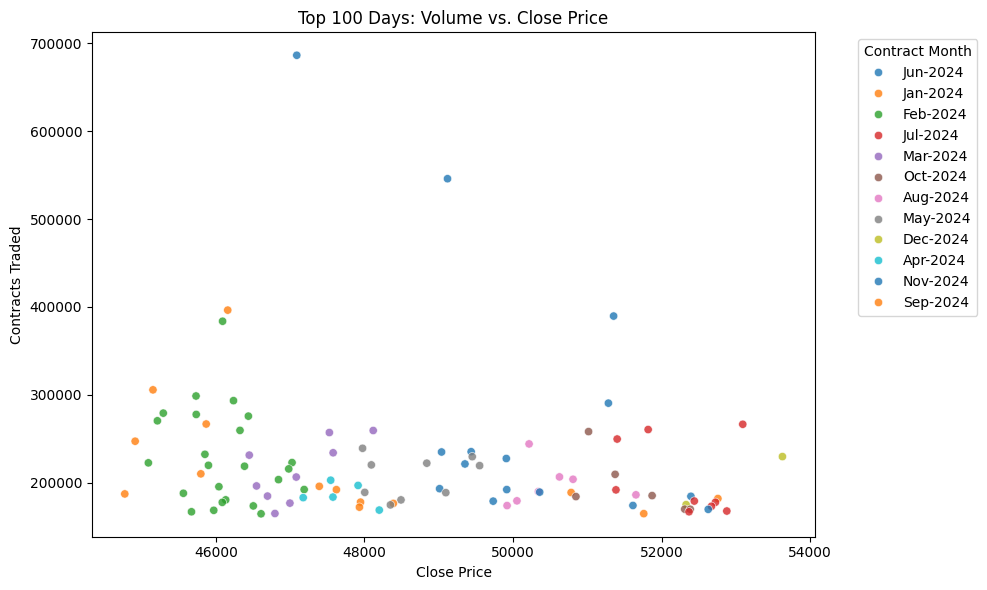

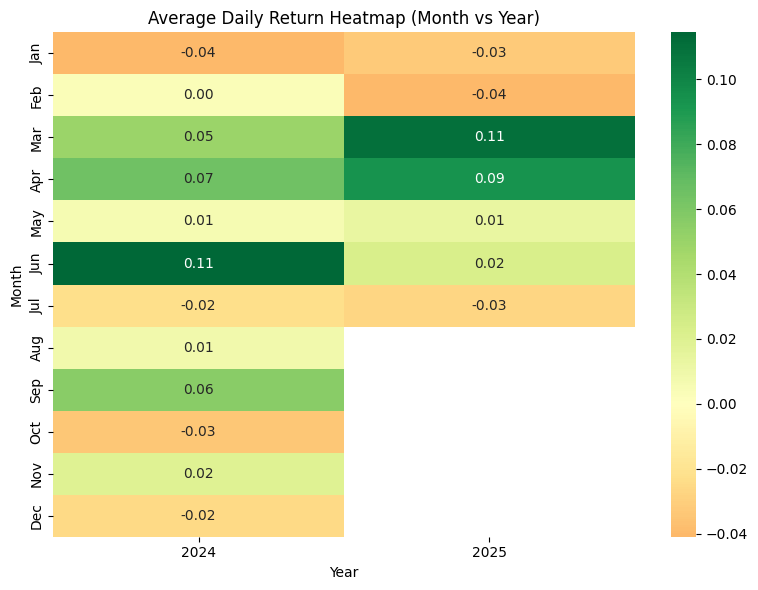

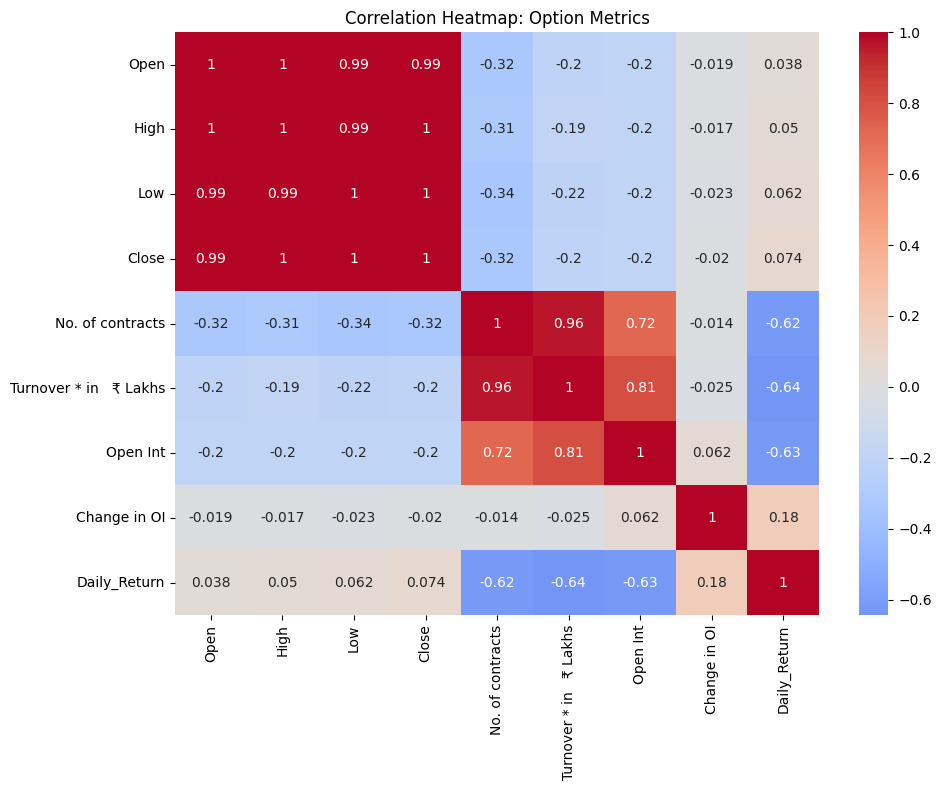

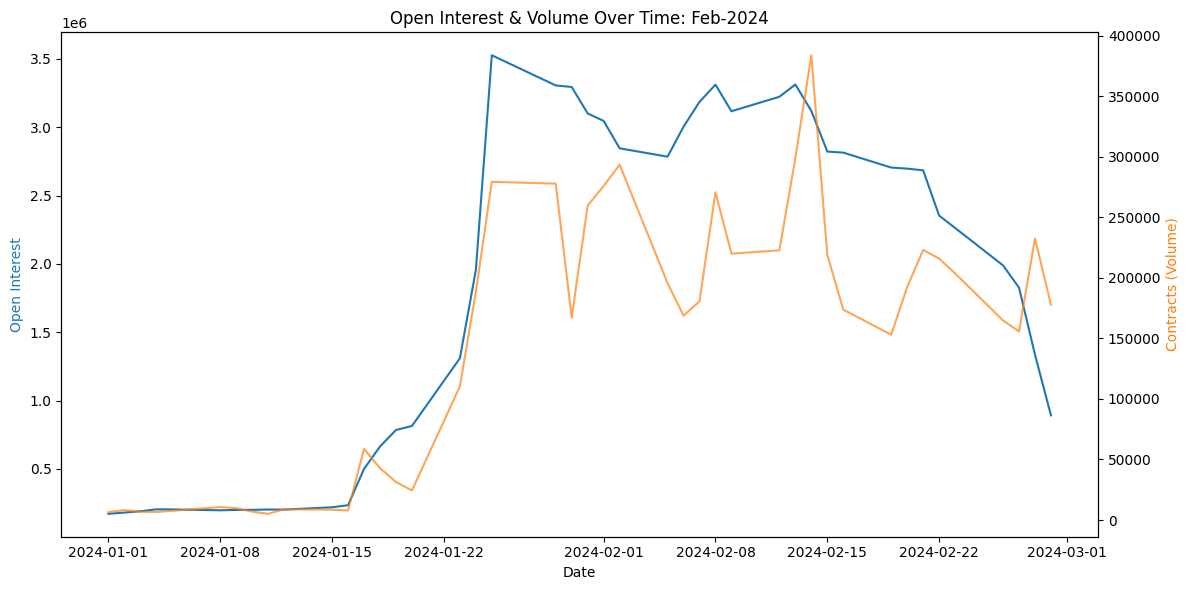

In [2]:
# Visualizing Option Data: Plots & Heatmaps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use the merged futures data as the cleaned dataframe
df_clean = futures_merged.copy()

# Clean 'Change in OI' column: replace '-' with np.nan and convert to float
df_clean['Change in OI'] = df_clean['Change in OI'].replace('-', np.nan).astype(float)

print("📊 OPTION DATA VISUALIZATION")
print("=" * 35)

# 1. Volume vs. Close Price Scatter Plot (Top 100 by Volume)
plt.figure(figsize=(10, 6))
top_volume = df_clean.nlargest(100, 'No. of contracts')

# Add Contract_Month column (extract month and year from Expiry)
top_volume['Contract_Month'] = top_volume['Expiry'].dt.strftime('%b-%Y')
df_clean['Contract_Month'] = df_clean['Expiry'].dt.strftime('%b-%Y')

sns.scatterplot(data=top_volume, x='Close', y='No. of contracts', hue='Contract_Month', palette='tab10', alpha=0.8)
plt.title('Top 100 Days: Volume vs. Close Price')
plt.xlabel('Close Price')
plt.ylabel('Contracts Traded')
plt.legend(title='Contract Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate Daily Return (percentage change in Close price)
df_clean['Daily_Return'] = df_clean['Close'].pct_change() * 100

# 2. Heatmap: Daily Returns by Month and Year
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.strftime('%b')
pivot_returns = df_clean.pivot_table(index='Month', columns='Year', values='Daily_Return', aggfunc='mean')
pivot_returns = pivot_returns.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_returns, annot=True, fmt=".2f", cmap='RdYlGn', center=0)
plt.title('Average Daily Return Heatmap (Month vs Year)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# 3. Heatmap: Correlation Matrix for Option Metrics
option_metrics = ['Open', 'High', 'Low', 'Close', 'No. of contracts', 'Turnover * in   ₹ Lakhs', 'Open Int', 'Change in OI', 'Daily_Return']
corr_matrix = df_clean[option_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Option Metrics')
plt.tight_layout()
plt.show()
# 4. Line Plot: Open Interest and Volume Over Time (Most Active Contract)
# Find the most active contract month by total volume
most_active_contract = df_clean.groupby('Contract_Month')['No. of contracts'].sum().idxmax()
active_contract_data = df_clean[df_clean['Contract_Month'] == most_active_contract]
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(active_contract_data['Date'], active_contract_data['Open Int'], color='tab:blue', label='Open Interest')
ax2.plot(active_contract_data['Date'], active_contract_data['No. of contracts'], color='tab:orange', label='Contracts (Volume)', alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Open Interest', color='tab:blue')
ax2.set_ylabel('Contracts (Volume)', color='tab:orange')
plt.title(f'Open Interest & Volume Over Time: {most_active_contract}')
fig.tight_layout()
plt.show()

# Clean up temporary columns
df_clean.drop(['Year', 'Month'], axis=1, inplace=True)

C:\Users\91894\AppData\Local\Temp\ipykernel_10044\2015125442.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

📋 Downloaded Bank Nifty Data Structure:
Shape: (384, 6)
Final columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

📈 Plotting Bank Nifty Index Data (Yahoo Finance)
Using columns: ['Open', 'High', 'Low', 'Close']
Plot data shape: (384, 6)


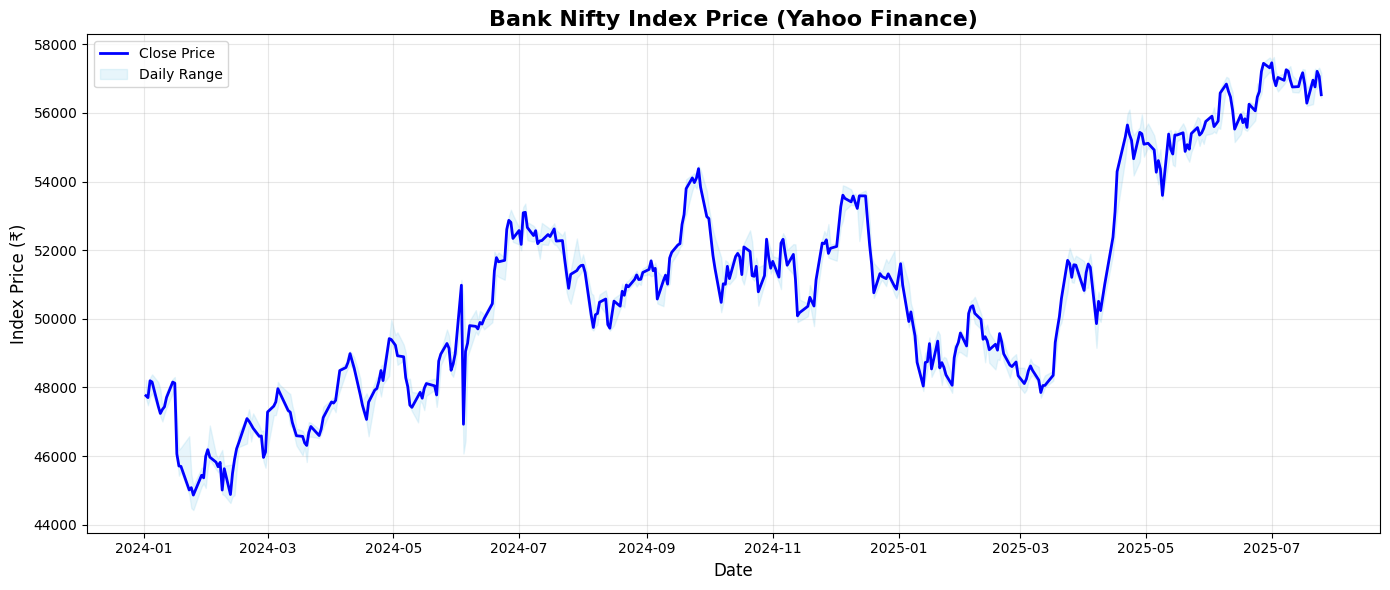

In [6]:
# Download Bank Nifty Index data using yfinance if not already loaded
import yfinance as yf

try:
    # Download historical data for Bank Nifty index (symbol: "^NSEBANK" on Yahoo Finance)
    bank_nifty = yf.download("^NSEBANK", start="2024-01-01", end=None)
    if bank_nifty is not None and not bank_nifty.empty:
        bank_nifty.reset_index(inplace=True)
        
        # Debug: Print column structure to understand the data format
        print("📋 Downloaded Bank Nifty Data Structure:")
        #print(f"Columns: {list(bank_nifty.columns)}")
        print(f"Shape: {bank_nifty.shape}")
        #print("\nFirst few rows:")
        #print(bank_nifty.head())
        
        # Handle multi-level columns if present (yfinance sometimes returns multi-level columns)
        if isinstance(bank_nifty.columns, pd.MultiIndex):
            # Flatten multi-level columns
            bank_nifty.columns = [col[0] if col[1] == '' else f"{col[0]}_{col[1]}" for col in bank_nifty.columns]
            #print(f"Flattened columns: {list(bank_nifty.columns)}")
        
        # Standardize column names
        column_mapping = {}
        for col in bank_nifty.columns:
            col_lower = str(col).lower()
            if 'open' in col_lower:
                column_mapping[col] = 'Open'
            elif 'high' in col_lower:
                column_mapping[col] = 'High'
            elif 'low' in col_lower:
                column_mapping[col] = 'Low'
            elif 'close' in col_lower or 'adj close' in col_lower:
                column_mapping[col] = 'Close'
            elif 'volume' in col_lower:
                column_mapping[col] = 'Volume'
        
        # Rename columns
        bank_nifty.rename(columns=column_mapping, inplace=True)
        print(f"Final columns: {list(bank_nifty.columns)}")
        
    else:
        print("❌ No data returned from yfinance for Bank Nifty.")
        bank_nifty = pd.DataFrame()
except Exception as e:
    print(f"❌ Error downloading Bank Nifty data: {e}")
    bank_nifty = pd.DataFrame()

# Plot Bank Nifty Index data downloaded from yfinance
if not bank_nifty.empty:
    print("\n📈 Plotting Bank Nifty Index Data (Yahoo Finance)")
    plt.figure(figsize=(14, 6))
    
    # Check which columns are available
    required_cols = ['Open', 'High', 'Low', 'Close']
    available_cols = [col for col in required_cols if col in bank_nifty.columns]
    
    if 'Date' in bank_nifty.columns and len(available_cols) >= 2:
        # Drop rows with NaN in available columns
        plot_data = bank_nifty.dropna(subset=['Date'] + available_cols)
        print(f"Using columns: {available_cols}")
        print(f"Plot data shape: {plot_data.shape}")
        
        # Plot Close price (or first available price column)
        price_col = 'Close' if 'Close' in available_cols else available_cols[0]
        plt.plot(plot_data['Date'], plot_data[price_col], label=f'{price_col} Price', color='blue', linewidth=2)
        
        # Add fill_between if High and Low are available
        if 'High' in available_cols and 'Low' in available_cols:
            plt.fill_between(plot_data['Date'], plot_data['Low'], plot_data['High'], 
                           color='skyblue', alpha=0.2, label='Daily Range')
        
        plt.title('Bank Nifty Index Price (Yahoo Finance)', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Index Price (₹)', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"❌ Required columns not found. Available columns: {list(bank_nifty.columns)}")
        print("Cannot create plot without proper price data.")
else:
    print("❌ No Bank Nifty data available to plot.")

In [4]:
# Bank Nifty Plotter with Controls
import plotly.graph_objects as go
from datetime import datetime
from ipywidgets import widgets, VBox, HBox, Button, Output
from IPython.display import display, clear_output

print("📊 BANK NIFTY INTERACTIVE PLOTTER")
print("=" * 40)

# Check if we have Bank Nifty data
if not bank_nifty.empty and 'Date' in bank_nifty.columns:
    
    # Get available price columns
    price_columns = [col for col in ['Open', 'High', 'Low', 'Close'] if col in bank_nifty.columns]
    
    if not price_columns:
        print("❌ No price columns found")
    else:
        print(f"✅ Available: {', '.join(price_columns)}")
        print(f"📅 Range: {bank_nifty['Date'].min():%d-%b-%Y} to {bank_nifty['Date'].max():%d-%b-%Y}")
        print(f"📊 Records: {len(bank_nifty):,}")
        
        # Create output area for plot
        plot_area = Output()
        
        # Create control widgets
        price_selector = widgets.Dropdown(
            options=price_columns,
            value='Close',
            description='Price Type:',
            style={'description_width': '80px'},
            layout={'width': '150px'}
        )
        
        start_date_picker = widgets.DatePicker(
            description='From:',
            value=bank_nifty['Date'].min().date(),
            style={'description_width': '50px'},
            layout={'width': '160px'}
        )
        
        end_date_picker = widgets.DatePicker(
            description='To:',
            value=bank_nifty['Date'].max().date(),
            style={'description_width': '50px'},
            layout={'width': '160px'}
        )
        
        plot_button = Button(
            description='📈 Plot',
            button_style='success',
            layout={'width': '80px'}
        )
        
        def make_single_plot():
            """Generate exactly one plot - called only by button click"""
            
            # Get current widget values
            price_type = price_selector.value
            start_date = datetime.combine(start_date_picker.value, datetime.min.time())
            end_date = datetime.combine(end_date_picker.value, datetime.min.time())
            #print("YO")
            # Clear previous plot
            with plot_area:
                
                clear_output(wait=True)
                
                # Filter data by date range
                mask = (bank_nifty['Date'] >= start_date) & (bank_nifty['Date'] <= end_date)
                data = bank_nifty.loc[mask].copy()
                
                if data.empty:
                    print("❌ No data for selected date range")
                    return
                
                # Create single plot
                fig = go.Figure()
                fig.add_trace(go.Scatter(
                    x=data['Date'],
                    y=data[price_type],
                    mode='lines+markers',
                    name=f'Bank Nifty {price_type}',
                    line=dict(color='#2E86C1', width=2.5),
                    marker=dict(size=3),
                    hovertemplate=f'<b>%{{x}}</b><br>{price_type}: ₹%{{y:,.0f}}<extra></extra>'
                ))
                
                fig.update_layout(
                    title=f'Bank Nifty {price_type} Price Analysis',
                    xaxis_title='Date',
                    yaxis_title=f'{price_type} Price (₹)',
                    height=450,
                    template='plotly_white',
                    showlegend=False,
                    hovermode='x unified'
                )
                
                fig.show()
                #print("BO")
                # Display statistics
                stats = data[price_type].describe()
                print(f"\n📊 {price_type} Analysis Summary:")
                print(f"   📅 Period: {start_date:%d-%b-%Y} to {end_date:%d-%b-%Y}")
                print(f"   📈 Data Points: {len(data):,}")
                print(f"   💰 Price Range: ₹{stats['min']:,.0f} - ₹{stats['max']:,.0f}")
                print(f"   📊 Average Price: ₹{stats['mean']:,.0f}")
                print(f"   📈 Standard Dev: ₹{stats['std']:,.0f}")
        
        # Button click handler
        def on_plot_button_clicked(b):
            make_single_plot()
        
        plot_button.on_click(on_plot_button_clicked)
        
        # Arrange controls in horizontal layout
        controls = HBox([
            price_selector,
            start_date_picker,
            end_date_picker,
            plot_button
        ])
        
        # Display interface
        print("\n🎛️ Controls:")
        display(controls)
        display(plot_area)
        
        # Create initial plot automatically
        print("\n📈 Initial plot (Close price, full range):")
        make_single_plot()

else:
    print("❌ No Bank Nifty data available")

📊 BANK NIFTY INTERACTIVE PLOTTER
✅ Available: Open, High, Low, Close
📅 Range: 02-Jan-2024 to 25-Jul-2025
📊 Records: 384

🎛️ Controls:


Output()


📈 Initial plot (Close price, full range):
YO


In [9]:
# Spot vs Expiry: Combined Plot of Bank Nifty Index and Futures Price
import plotly.graph_objects as go
from ipywidgets import widgets, interact

if not df_clean.empty and not bank_nifty.empty:
    print("📊 SPOT vs EXPIRY ANALYSIS")
    print("=" * 30)
    
    # Get available expiry dates from futures data
    expiry_options = df_clean['Expiry'].dropna().unique()
    expiry_dropdown = widgets.Dropdown(
        options=sorted(expiry_options),
        value=expiry_options[0],
        description='Expiry Date:',
        style={'description_width': '100px'},
        layout={'width': '300px'}
    )
    
    # Price type selectors for spot and futures - using dropdowns
    spot_price_dropdown = widgets.Dropdown(
        options=['Open', 'High', 'Low', 'Close'],
        value='Close',
        description='Spot Price:',
        style={'description_width': '80px'},
        layout={'width': '160px'}
    )
    
    futures_price_dropdown = widgets.Dropdown(
        options=['Open', 'High', 'Low', 'Close'],
        value='Close',
        description='Futures Price:',
        style={'description_width': '80px'},
        layout={'width': '160px'}
    )
    
    def plot_spot_vs_expiry(expiry, spot_price_type, futures_price_type):
        """Create comparison plot between spot and futures prices"""
        
        # Filter futures data for selected expiry
        futures_data = df_clean[df_clean['Expiry'] == expiry].copy()
        
        if futures_data.empty:
            print(f"❌ No futures data available for expiry {expiry.strftime('%d-%b-%Y')}")
            return
        
        # Get date range from futures data
        start_date = futures_data['Date'].min()
        end_date = futures_data['Date'].max()
        
        # Filter Bank Nifty spot data for the same date range
        mask = (bank_nifty['Date'] >= start_date) & (bank_nifty['Date'] <= end_date)
        spot_data = bank_nifty.loc[mask].copy()
        
        if spot_data.empty:
            print(f"❌ No Bank Nifty spot data available for date range")
            return
        
        # Create the combined plot
        fig = go.Figure()
        
        # Add Bank Nifty spot price line
        fig.add_trace(go.Scatter(
            x=spot_data['Date'],
            y=spot_data[spot_price_type],
            mode='lines',
            name=f'Bank Nifty Spot ({spot_price_type})',
            line=dict(color='#1f77b4', width=3),
            hovertemplate=f'Date: %{{x}}<br>Spot {spot_price_type}: ₹%{{y:,.0f}}<extra></extra>'
        ))
        
        # Add futures price line
        fig.add_trace(go.Scatter(
            x=futures_data['Date'],
            y=futures_data[futures_price_type],
            mode='lines',
            name=f'Futures ({expiry.strftime("%d-%b-%Y")} Expiry)',
            line=dict(color='#ff7f0e', width=3),
            hovertemplate=f'Date: %{{x}}<br>Futures {futures_price_type}: ₹%{{y:,.0f}}<extra></extra>'
        ))
        
        # Calculate and add basis (Futures - Spot) on secondary y-axis
        merged_data = pd.merge(
            spot_data[['Date', spot_price_type]].rename(columns={spot_price_type: 'Spot'}),
            futures_data[['Date', futures_price_type]].rename(columns={futures_price_type: 'Futures'}),
            on='Date',
            how='inner'
        )
        
        if not merged_data.empty:
            merged_data['Basis'] = merged_data['Futures'] - merged_data['Spot']
            
            # Add basis line on secondary y-axis
            fig.add_trace(go.Scatter(
                x=merged_data['Date'],
                y=merged_data['Basis'],
                mode='lines',
                name='Basis (F-S)',
                line=dict(color='#2ca02c', width=2, dash='dash'),
                yaxis='y2',
                hovertemplate='Date: %{x}<br>Basis: ₹%{y:,.0f}<br>(Futures - Spot)<extra></extra>'
            ))
        
        # Update layout with dual y-axes
        fig.update_layout(
            title=f'Spot vs Expiry Analysis<br>Spot {spot_price_type} vs Futures {futures_price_type} (Expiry: {expiry.strftime("%d-%b-%Y")})',
            xaxis_title='Date',
            yaxis=dict(
                title=f'Price (₹)',
                side='left'
            ),
            yaxis2=dict(
                title='Basis (₹)',
                side='right',
                overlaying='y',
                showgrid=False
            ),
            hovermode='x unified',
            height=600,
            showlegend=True,
            legend=dict(x=0.02, y=0.98),
            template='plotly_white'
        )
        
        # Add statistics annotation
        if not merged_data.empty:
            avg_basis = merged_data['Basis'].mean()
            max_basis = merged_data['Basis'].max()
            min_basis = merged_data['Basis'].min()
            days_to_expiry = (expiry - merged_data['Date'].max()).days
            
            stats_text = f"""📊 Statistics:
Avg Basis: ₹{avg_basis:,.0f}
Max Basis: ₹{max_basis:,.0f}
Min Basis: ₹{min_basis:,.0f}
Days to Expiry: {days_to_expiry}
Data Points: {len(merged_data)}"""
            
            fig.add_annotation(
                x=0.98, y=0.02,
                xref='paper', yref='paper',
                text=stats_text,
                showarrow=False,
                align='right',
                bordercolor='gray',
                borderwidth=1,
                bgcolor='rgba(255,255,255,0.9)',
                font=dict(size=10, family='monospace')
            )
        
        fig.show()
        
        # Display detailed summary
        print(f"\n📈 ANALYSIS SUMMARY:")
        print("-" * 25)
        print(f"🎯 Expiry Date: {expiry.strftime('%d-%b-%Y')}")
        print(f"📊 Price Comparison: Spot {spot_price_type} vs Futures {futures_price_type}")
        print(f"📅 Analysis Period: {start_date.strftime('%d-%b-%Y')} to {end_date.strftime('%d-%b-%Y')}")
        print(f"📈 Trading Days: {len(futures_data)} (futures), {len(spot_data)} (spot)")
        
        if not merged_data.empty:
            print(f"🔗 Common Days: {len(merged_data)}")
            print(f"💰 Average Basis: ₹{merged_data['Basis'].mean():,.2f}")
            print(f"⏰ Days to Expiry: {(expiry - merged_data['Date'].max()).days}")
            
            # Basis analysis
            positive_basis_days = (merged_data['Basis'] > 0).sum()
            negative_basis_days = (merged_data['Basis'] < 0).sum()
            print(f"📊 Contango Days: {positive_basis_days} ({positive_basis_days/len(merged_data)*100:.1f}%)")
            print(f"📉 Backwardation Days: {negative_basis_days} ({negative_basis_days/len(merged_data)*100:.1f}%)")
    
    # Create interactive interface with horizontal layout
    print(f"\n🎛️ INTERACTIVE CONTROLS:")
    print("-" * 25)
    
    # Create plot button
    plot_button = widgets.Button(
        description='📈 Plot Analysis',
        button_style='success',
        layout={'width': '120px'}
    )
    
    # Create output area for the plot
    plot_output = widgets.Output()
    
    def on_plot_button_click(b):
        """Handle plot button click"""
        with plot_output:
            plot_output.clear_output(wait=True)
            plot_spot_vs_expiry(
                expiry_dropdown.value,
                spot_price_dropdown.value,
                futures_price_dropdown.value
            )
    
    plot_button.on_click(on_plot_button_click)
    
    # Arrange controls in horizontal layout
    controls_row = widgets.HBox([
        expiry_dropdown,
        spot_price_dropdown,
        futures_price_dropdown,
        plot_button
    ])
    
    # Display the interface
    display(controls_row)
    display(plot_output)
    
    # Generate initial plot
    print("\n📈 Initial Analysis (First expiry, Close prices):")
    with plot_output:
        plot_spot_vs_expiry(
            expiry_dropdown.value,
            spot_price_dropdown.value,
            futures_price_dropdown.value
        )
    
else:
    print("❌ Both futures and Bank Nifty spot data required for comparison")
    if df_clean.empty:
        print("   Missing: Futures data")
    if bank_nifty.empty:
        print("   Missing: Bank Nifty spot data")

📊 SPOT vs EXPIRY ANALYSIS

🎛️ INTERACTIVE CONTROLS:
-------------------------


Output()


📈 Initial Analysis (First expiry, Close prices):


In [10]:
#!pip install kiteconnect
from kiteconnect import KiteConnect
import pandas as pd
import os

# Load API key and access token from environment variables for security
api_key = "v2qa0jwrkw1l7489"
access_token = "17b9qraamiojz39sj7xa0hkaoqctf7fu"

kite = KiteConnect(api_key=api_key)
kite.set_access_token(access_token)

# Example: Fetch option chain for Bank Nifty (replace with your instrument_token if needed)
# Get instruments list and filter for Bank Nifty options
instruments = kite.instruments(exchange="NFO")
banknifty_options = [inst for inst in instruments if inst['name'] == 'BANKNIFTY' and inst['segment'] == 'NFO-OPT']

# Create DataFrame for tabular display
option_chain_df = pd.DataFrame(banknifty_options)

# Display relevant columns
display_columns = ['tradingsymbol', 'strike', 'expiry', 'instrument_type', 'lot_size', 'tick_size']
print("Bank Nifty Option Chain (Zerodha Kite):")
display(option_chain_df[display_columns].head(20))

Bank Nifty Option Chain (Zerodha Kite):


,tradingsymbol,strike,expiry,instrument_type,lot_size,tick_size
0,BANKNIFTY25JUL56500CE,56500.0,2025-07-31,CE,35,0.05
1,BANKNIFTY25JUL56500PE,56500.0,2025-07-31,PE,35,0.05
2,BANKNIFTY25JUL56600CE,56600.0,2025-07-31,CE,35,0.05
3,BANKNIFTY25JUL56600PE,56600.0,2025-07-31,PE,35,0.05
4,BANKNIFTY25JUL56400CE,56400.0,2025-07-31,CE,35,0.05
5,BANKNIFTY25JUL56400PE,56400.0,2025-07-31,PE,35,0.05
6,BANKNIFTY25JUL56700CE,56700.0,2025-07-31,CE,35,0.05
7,BANKNIFTY25JUL56700PE,56700.0,2025-07-31,PE,35,0.05
8,BANKNIFTY25JUL56300CE,56300.0,2025-07-31,CE,35,0.05
9,BANKNIFTY25JUL56300PE,56300.0,2025-07-31,PE,35,0.05


In [11]:
# Interactive Option Chain Table - CE/PE Side by Side
print("🔄 INTERACTIVE OPTION CHAIN TABLE")
print("=" * 40)

if not option_chain_df.empty:
    # Create expiry dropdown for filtering
    available_expiries = sorted(option_chain_df['expiry'].unique())
    expiry_filter = widgets.Dropdown(
        options=['All Expiries'] + [str(exp) for exp in available_expiries],
        value='All Expiries',
        description='Select Expiry:',
        style={'description_width': 'initial'},
        layout={'width': '300px'}
    )
    
    # Strike range slider
    min_strike = option_chain_df['strike'].min()
    max_strike = option_chain_df['strike'].max()
    strike_range = widgets.IntRangeSlider(
        value=[min_strike, min_strike + 2000],  # Default to show 2000 points range
        min=min_strike,
        max=max_strike,
        step=50,
        description='Strike Range:',
        style={'description_width': 'initial'},
        layout={'width': '400px'}
    )
    
    def create_option_chain_table(selected_expiry, strike_range_val):
        # Filter data based on selections
        filtered_data = option_chain_df.copy()
        
        if selected_expiry != 'All Expiries':
            filtered_data = filtered_data[filtered_data['expiry'] == selected_expiry]
        
        # Filter by strike range
        min_strike, max_strike = strike_range_val
        filtered_data = filtered_data[
            (filtered_data['strike'] >= min_strike) & 
            (filtered_data['strike'] <= max_strike)
        ]
        
        if filtered_data.empty:
            print("❌ No data available for selected filters")
            return
        
        # Separate CE and PE options
        ce_options = filtered_data[filtered_data['instrument_type'] == 'CE'].copy()
        pe_options = filtered_data[filtered_data['instrument_type'] == 'PE'].copy()
        
        # Prepare CE data
        ce_display = ce_options[['strike', 'tradingsymbol', 'expiry', 'lot_size']].copy()
        ce_display.columns = ['Strike', 'CE_Symbol', 'CE_Expiry', 'CE_LotSize']
        
        # Prepare PE data  
        pe_display = pe_options[['strike', 'tradingsymbol', 'expiry', 'lot_size']].copy()
        pe_display.columns = ['Strike', 'PE_Symbol', 'PE_Expiry', 'PE_LotSize']
        
        # Merge CE and PE on strike price
        option_chain_combined = pd.merge(
            ce_display, pe_display, 
            on='Strike', 
            how='outer',
            suffixes=('_CE', '_PE')
        ).fillna('-')
        
        # Sort by strike price
        option_chain_combined = option_chain_combined.sort_values('Strike')
        
        # Format for better display
        option_chain_combined['Strike'] = option_chain_combined['Strike'].apply(lambda x: f"₹{x:,.0f}")
        
        # Reorder columns for better layout
        display_columns = [
            'CE_Symbol', 'CE_LotSize', 'Strike', 'PE_LotSize', 'PE_Symbol'
        ]
        
        final_display = option_chain_combined[display_columns].copy()
        final_display.columns = [
            'Call Symbol', 'Call Lot Size', 'Strike Price', 'Put Lot Size', 'Put Symbol'
        ]
        
        # Display statistics
        total_strikes = len(option_chain_combined)
        ce_count = len(ce_options)
        pe_count = len(pe_options)
        
        print(f"📊 FILTERED RESULTS:")
        print(f"🎯 Strikes Displayed: {total_strikes}")
        print(f"📞 Call Options: {ce_count}")
        print(f"📉 Put Options: {pe_count}")
        
        if selected_expiry != 'All Expiries':
            print(f"📅 Expiry: {selected_expiry}")
        else:
            expiry_count = filtered_data['expiry'].nunique()
            print(f"📅 Expiries Included: {expiry_count}")
        
        print(f"💰 Strike Range: ₹{min_strike:,} - ₹{max_strike:,}")
        print("\n" + "="*80)
        
        # Set pandas display options for better table formatting
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', None)
        pd.set_option('display.max_colwidth', 25)
        
        # Display the table
        print("\n📋 OPTION CHAIN TABLE (CE/PE Side by Side):")
        print("-" * 80)
        display(final_display)
        
        # Show expiry breakdown if showing all expiries
        if selected_expiry == 'All Expiries' and not filtered_data.empty:
            print(f"\n📊 EXPIRY BREAKDOWN:")
            print("-" * 25)
            expiry_breakdown = filtered_data.groupby(['expiry', 'instrument_type']).size().unstack(fill_value=0)
            expiry_breakdown['Total'] = expiry_breakdown.sum(axis=1)
            display(expiry_breakdown)
    
    # Create interactive interface
    print("🎛️ FILTER CONTROLS:")
    print("-" * 20)
    interact(create_option_chain_table, 
             selected_expiry=expiry_filter, 
             strike_range_val=strike_range)
    
else:
    print("❌ No option chain data available from Kite API")
    print("Please check your API connection and credentials")

🔄 INTERACTIVE OPTION CHAIN TABLE
🎛️ FILTER CONTROLS:
--------------------


interactive(children=(Dropdown(description='Select Expiry:', layout=Layout(width='300px'), options=('All Expir…